In [1]:
import pandas as pd
from IPython.display import HTML

In [4]:
rating = pd.read_csv('data/'+'rating'+'.csv',header=0)
rating.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/rating.csv'

In [ ]:
rating.dtypes

- Checar los tipos de dato, para los que es mejor:
    - userId & movieId que sean string por si llegasen a haber ceros a la izquierda del elemento
    - timestamp, que se parsee desde el inicio como fecha

In [2]:
rating = pd.read_csv('data/'+'rating'+'.csv',header=0, parse_dates=['timestamp'], dtype = {"userId" : "str","movieId" : "str"})
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [3]:
rating.dtypes

userId               object
movieId              object
rating              float64
timestamp    datetime64[ns]
dtype: object

In [4]:
rating_01 = rating.sort_values(by=['timestamp'], ascending=True)

In [5]:
rating_gb =  (rating_01 \
                 .groupby(['userId']))
rating_gb.head()

,userId,movieId,rating,timestamp
4182421,28507,1176,4.0,1995-01-09 11:46:44
18950979,131160,1079,3.0,1995-01-09 11:46:49
18950936,131160,47,5.0,1995-01-09 11:46:49
18950930,131160,21,3.0,1995-01-09 11:46:49
12341178,85252,45,3.0,1996-01-29 00:00:00
...,...,...,...,...
19742798,136690,318,5.0,2015-03-31 04:12:42
19742807,136690,1198,5.0,2015-03-31 04:12:44
19742796,136690,260,4.5,2015-03-31 04:12:49
19742806,136690,1196,5.0,2015-03-31 04:12:53


In [6]:
rating_01a = rating_01
rating_01a['timestamp_lagged'] = (rating_gb['timestamp'].shift(1))

rating_01a

,userId,movieId,rating,timestamp,timestamp_lagged
4182421,28507,1176,4.0,1995-01-09 11:46:44,NaT
18950979,131160,1079,3.0,1995-01-09 11:46:49,NaT
18950936,131160,47,5.0,1995-01-09 11:46:49,1995-01-09 11:46:49
18950930,131160,21,3.0,1995-01-09 11:46:49,1995-01-09 11:46:49
12341178,85252,45,3.0,1996-01-29 00:00:00,NaT
...,...,...,...,...,...
7819902,53930,118706,3.5,2015-03-31 06:00:51,2015-03-28 21:52:36
2508834,16978,2093,3.5,2015-03-31 06:03:17,2015-03-31 06:00:28
12898546,89081,55232,3.5,2015-03-31 06:11:26,2015-03-29 14:08:29
12898527,89081,52458,4.0,2015-03-31 06:11:28,2015-03-31 06:11:26


In [7]:
rating_01a_sizeminmaxtime = rating_gb['timestamp'].agg(['min','max','size'])
rating_01a_sizeminmaxtime.rename(columns = {'min' : 'min_timestamp', 'max' : 'max_timestamp','size':'num_ratings'}, inplace = True)

rating_01a_sizeminmaxtime

,min_timestamp,max_timestamp,num_ratings
userId,,,
1,2004-09-10 03:06:38,2005-04-02 23:56:41,175
10,1999-11-25 02:32:02,1999-11-25 02:46:26,38
100,1996-06-25 16:21:49,1997-06-09 16:43:14,52
1000,2012-01-03 00:42:48,2012-01-03 01:13:59,57
10000,1996-11-27 17:00:21,1996-11-27 17:18:33,73
...,...,...,...
99995,1996-06-25 12:20:44,1996-07-01 10:26:41,65
99996,1997-03-18 05:46:14,1997-03-18 05:50:16,27
99997,2013-12-09 18:36:21,2013-12-09 19:04:01,28


In [8]:
rating_02 = pd.merge(rating_01a,rating_01a_sizeminmaxtime,on='userId',how='left') 

rating_02['dif_minmaxtimestamp'] = (rating_02.max_timestamp - rating_02.min_timestamp)
rating_02['dif_minmaxdays'] = rating_02.dif_minmaxtimestamp.dt.days

rating_02['dif_lagtimestamp'] = (rating_02.timestamp - rating_02.timestamp_lagged)
rating_02['dif_lagdays'] = rating_02.dif_lagtimestamp.dt.days

rating_02['current_year'] = rating_02.timestamp.dt.year

rating_02

,userId,movieId,rating,timestamp,timestamp_lagged,min_timestamp,max_timestamp,num_ratings,dif_minmaxtimestamp,dif_minmaxdays,dif_lagtimestamp,dif_lagdays,current_year
0,28507,1176,4.0,1995-01-09 11:46:44,NaT,1995-01-09 11:46:44,1997-05-14 10:39:41,116,855 days 22:52:57,855,NaT,NaN,1995
1,131160,1079,3.0,1995-01-09 11:46:49,NaT,1995-01-09 11:46:49,1997-01-09 11:48:47,62,731 days 00:01:58,731,NaT,NaN,1995
2,131160,47,5.0,1995-01-09 11:46:49,1995-01-09 11:46:49,1995-01-09 11:46:49,1997-01-09 11:48:47,62,731 days 00:01:58,731,0 days 00:00:00,0.0,1995
3,131160,21,3.0,1995-01-09 11:46:49,1995-01-09 11:46:49,1995-01-09 11:46:49,1997-01-09 11:48:47,62,731 days 00:01:58,731,0 days 00:00:00,0.0,1995
4,85252,45,3.0,1996-01-29 00:00:00,NaT,1996-01-29 00:00:00,1996-12-14 14:26:30,198,320 days 14:26:30,320,NaT,NaN,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20000258,53930,118706,3.5,2015-03-31 06:00:51,2015-03-28 21:52:36,2000-08-15 00:02:35,2015-03-31 06:00:51,1430,5341 days 05:58:16,5341,2 days 08:08:15,2.0,2015
20000259,16978,2093,3.5,2015-03-31 06:03:17,2015-03-31 06:00:28,2013-05-18 18:46:42,2015-03-31 06:03:17,708,681 days 11:16:35,681,0 days 00:02:49,0.0,2015
20000260,89081,55232,3.5,2015-03-31 06:11:26,2015-03-29 14:08:29,2009-05-09 05:42:23,2015-03-31 06:11:28,1609,2152 days 00:29:05,2152,1 days 16:02:57,1.0,2015
20000261,89081,52458,4.0,2015-03-31 06:11:28,2015-03-31 06:11:26,2009-05-09 05:42:23,2015-03-31 06:11:28,1609,2152 days 00:29:05,2152,0 days 00:00:02,0.0,2015


In [13]:
rating_02[rating_02.userId=='87586']

,userId,movieId,rating,timestamp,timestamp_lagged,min_timestamp,max_timestamp,num_ratings,dif_minmaxtimestamp,dif_minmaxdays,dif_lagtimestamp,dif_lagdays,current_year
3069368,87586,2763,3.0,1999-10-23 18:25:58,NaT,1999-10-23 18:25:58,2015-03-31 06:40:02,670,5637 days 12:14:04,5637,NaT,NaN,1999
3069381,87586,2962,2.0,1999-10-23 18:27:02,1999-10-23 18:25:58,1999-10-23 18:25:58,2015-03-31 06:40:02,670,5637 days 12:14:04,5637,0 days 00:01:04,0.0,1999
3069502,87586,2977,5.0,1999-10-23 18:51:59,1999-10-23 18:27:02,1999-10-23 18:25:58,2015-03-31 06:40:02,670,5637 days 12:14:04,5637,0 days 00:24:57,0.0,1999
3069509,87586,2719,1.0,1999-10-23 18:52:27,1999-10-23 18:51:59,1999-10-23 18:25:58,2015-03-31 06:40:02,670,5637 days 12:14:04,5637,0 days 00:00:28,0.0,1999
3069532,87586,1238,3.0,1999-10-23 18:54:42,1999-10-23 18:52:27,1999-10-23 18:25:58,2015-03-31 06:40:02,670,5637 days 12:14:04,5637,0 days 00:02:15,0.0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19997040,87586,107141,3.5,2015-03-30 04:10:54,2015-03-30 04:08:07,1999-10-23 18:25:58,2015-03-31 06:40:02,670,5637 days 12:14:04,5637,0 days 00:02:47,0.0,2015
19997041,87586,104841,5.0,2015-03-30 04:11:16,2015-03-30 04:10:54,1999-10-23 18:25:58,2015-03-31 06:40:02,670,5637 days 12:14:04,5637,0 days 00:00:22,0.0,2015
19997042,87586,97304,4.5,2015-03-30 04:11:36,2015-03-30 04:11:16,1999-10-23 18:25:58,2015-03-31 06:40:02,670,5637 days 12:14:04,5637,0 days 00:00:20,0.0,2015
19997044,87586,92259,4.5,2015-03-30 04:13:43,2015-03-30 04:11:36,1999-10-23 18:25:58,2015-03-31 06:40:02,670,5637 days 12:14:04,5637,0 days 00:02:07,0.0,2015


In [14]:
rating_02.shape

(20000263, 13)

In [26]:
BASE = "rating_02"
rating_02.to_pickle("data/" + BASE + ".pkl")

In [9]:
data = rating_02[['rating','current_year']]
data

,rating,current_year
0,4.0,1995
1,3.0,1995
2,5.0,1995
3,3.0,1995
4,3.0,1996
...,...,...
20000258,3.5,2015
20000259,3.5,2015
20000260,3.5,2015
20000261,4.0,2015


In [10]:
%%capture
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
plt.rcParams["animation.html"] = "jshtml"
import numpy as np

In [11]:
years = sorted(rating_02.current_year.unique())
years

[1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

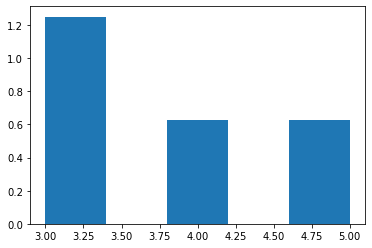

In [12]:
num_bins = 5

years_selected = years # [x for x in years if x >2005]
fig, ax = plt.subplots()
def animate05(i):
    x = np.array(data[data.current_year==years_selected[i]].rating.tolist()) #select data range
#    plt.hist(data_tmp)
    n, bins, patches = ax.hist(x, num_bins, density=True)

ani = matplotlib.animation.FuncAnimation(fig, animate05, frames=len(years_selected), repeat=True) #

In [18]:
ani

In [35]:
avgs = rating_02.groupby('current_year').agg(number_ratings=('rating','size'),
                                             mean_rating=('rating','mean'))
avgs

,number_ratings,mean_rating
current_year,,
1995,4,3.750000
1996,1612609,3.545408
1997,700982,3.588522
1998,308070,3.512484
1999,1198384,3.616337
2000,1953659,3.576119
2001,1186125,3.533771
2002,869719,3.482654
2003,1035878,3.474775


* Hacia la mitad de los años con los que contamos, notamos que fueron surgiendo usuarios más exigentes y que llegan a castigar sin medias tintas la calificación de las películas aunque, en promedio, los ratings por año son muy estables

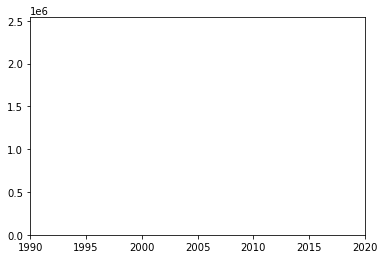

In [76]:
#avgs
years_selected = years # [x for x in years if x >2005]

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [])
#ax = plt.axes(xlim=(1994, 2020), ylim=(0, 1000000))

def init():
    ax.set_xlim(1990, 2020)
    ax.set_ylim(0, max(avgs.number_ratings)*1.3)
    return ln,

def update(frame):
    #frame = years_selected[preframe]
    xdata.append(frame)
    ydata.append(avgs.filter(like=str(frame),axis=0).number_ratings)
    ln.set_data(xdata, ydata)
    return ln,

ani03 = matplotlib.animation.FuncAnimation(fig, update, frames=years_selected,
                    init_func=init,
                    blit=True)


In [77]:
ani03